In [1]:
import tensorflow as tf

In [2]:
# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

--2022-06-06 10:13:31--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.66.48, 142.250.66.80, 142.250.66.112, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.66.48|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480187 (11M) [application/zip]
Saving to: 'validation-horse-or-human.zip'

     0K .......... .......... .......... .......... ..........  0% 1.17M 9s
    50K .......... .......... .......... .......... ..........  0% 2.40M 7s
   100K .......... .......... .......... .......... ..........  1% 4.20M 5s
   150K .......... .......... .......... .......... ..........  1% 4.99M 5s
   200K .......... .......... .......... .......... ..........  2% 6.41M 4s
   250K .......... .......... .......... .......... ..........  2% 8.68M 4s
   300K .......... .......... .......... .......... ..........  3% 9.51M 3s
   350K ..

In [3]:
import zipfile
# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()


In [80]:
import os

# Directory with training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [81]:
print(f'total training horse images: {len(os.listdir(train_horse_dir))}')
print(f'total training human images: {len(os.listdir(train_human_dir))}')
print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

total training horse images: 500
total training human images: 537
total validation horse images: 128
total validation human images: 128


In [1]:
import tensorflow as tf

model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution (You can uncomment the 4th and 5th conv layers later to see the effect)
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fifth convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [3]:
input=[layer.input for layer in model.layers]
input

[<KerasTensor: shape=(None, 150, 150, 3) dtype=float32 (created by layer 'conv2d_input')>,
 <KerasTensor: shape=(None, 148, 148, 16) dtype=float32 (created by layer 'conv2d')>,
 <KerasTensor: shape=(None, 74, 74, 16) dtype=float32 (created by layer 'max_pooling2d')>,
 <KerasTensor: shape=(None, 72, 72, 32) dtype=float32 (created by layer 'conv2d_1')>,
 <KerasTensor: shape=(None, 36, 36, 32) dtype=float32 (created by layer 'max_pooling2d_1')>,
 <KerasTensor: shape=(None, 34, 34, 64) dtype=float32 (created by layer 'conv2d_2')>,
 <KerasTensor: shape=(None, 17, 17, 64) dtype=float32 (created by layer 'max_pooling2d_2')>,
 <KerasTensor: shape=(None, 18496) dtype=float32 (created by layer 'flatten')>,
 <KerasTensor: shape=(None, 512) dtype=float32 (created by layer 'dense')>]

In [85]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

# Preprocessing data

In [82]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# DataGenerator for train set
train_datagen=ImageDataGenerator(rescale=1/255)
train_generator=train_datagen.flow_from_directory(
    './horse-or-human/',
    target_size=(150,150),
    batch_size=128,
    class_mode='binary')

#DataGen for validation set
validation_datagen=ImageDataGenerator(rescale=1/255)
validation_generator=validation_datagen.flow_from_directory(
    './validation-horse-or-human/',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary')

Found 1036 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# Training

In [83]:
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs={}):
        if (logs.get('accuracy')>=0.95):
            print('\nStop training')
            self.model.stop_training=True
callbacks=myCallback()


In [87]:
history=model.fit(train_generator,
                  steps_per_epoch=8,
                  epochs=15,
                  verbose=1,
                  validation_data = validation_generator,
                  validation_steps=8,
                  )

Epoch 1/15
8/8 [==============================] - 8s 970ms/step - loss: 0.0303 - accuracy: 0.9945 - val_loss: 1.8129 - val_accuracy: 0.8125
Epoch 2/15
8/8 [==============================] - 8s 952ms/step - loss: 0.1542 - accuracy: 0.9515 - val_loss: 2.0341 - val_accuracy: 0.7852
Epoch 3/15
8/8 [==============================] - 8s 952ms/step - loss: 0.0286 - accuracy: 0.9978 - val_loss: 1.8473 - val_accuracy: 0.8242
Epoch 4/15
8/8 [==============================] - 8s 1s/step - loss: 0.0225 - accuracy: 0.9989 - val_loss: 1.8340 - val_accuracy: 0.8203
Epoch 5/15
8/8 [==============================] - 8s 936ms/step - loss: 0.0167 - accuracy: 0.9978 - val_loss: 0.6372 - val_accuracy: 0.8906
Epoch 6/15
8/8 [==============================] - 8s 951ms/step - loss: 0.2510 - accuracy: 0.9372 - val_loss: 2.3708 - val_accuracy: 0.7852
Epoch 7/15
8/8 [==============================] - 8s 965ms/step - loss: 0.0220 - accuracy: 0.9978 - val_loss: 2.2455 - val_accuracy: 0.7969
Epoch 8/15
8/8 [=======

# Test with handpicked image

In [92]:
from ipywidgets import FileUpload
upload=FileUpload(multiple=True)
display(upload)

FileUpload(value={}, description='Upload', multiple=True)

In [98]:
import numpy as np
from tensorflow.keras.preprocessing import image
for fn in upload.value.keys():
    path=os.path.join('./image/',fn)
    img=image.load_img(path,target_size=(150,150))
    x=image.img_to_array(img)
    x/=255
    x=np.expand_dims(x,axis=0)
    images = np.vstack([x])
    classes = model.predict(images, batch_size=10)
    print(classes[0])
    
    if classes[0]>0.5:
        print(fn + " is a human")
    else:
        print(fn + " is a horse")

[1.]
human5.png is a human


# Visualizing Intermediate Representations

You can also look again at the intermediate representations. You will notice that the output at the last convolution layer is even more abstract because it contains fewer pixels than before.

In [29]:
train_horse_names=os.listdir(train_horse_dir)
train_human_names=os.listdir(train_human_dir)

C:\Users\Administrator\AppData\Local\Temp\ipykernel_12944\2408034901.py:47: RuntimeWarning: invalid value encountered in true_divide
  x /= x.std()


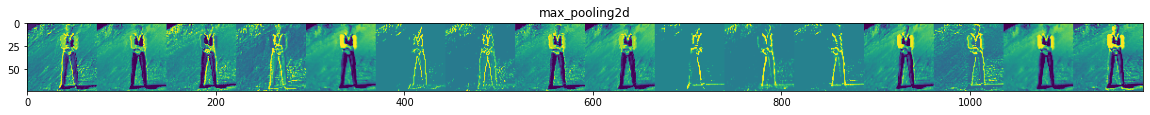

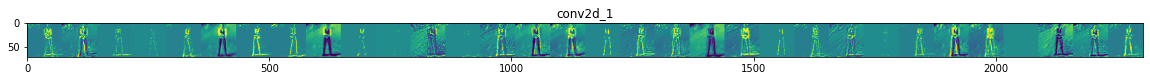

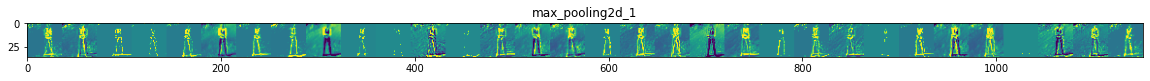

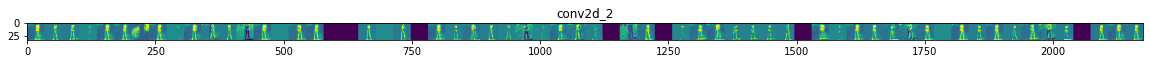

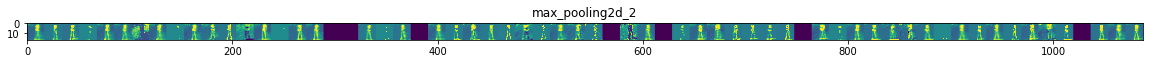

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)
img = load_img(img_path, target_size=(150, 150))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (150, 150, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 150, 150, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)
print(succesive_feature_maps

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map (number of filters

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

horse1.jpg


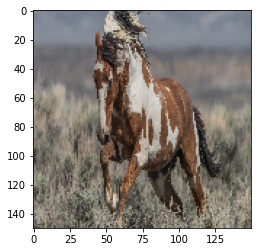

In [74]:
image_dir=os.path.join('./image/')
image_names=os.listdir(image_dir)
x=1
chosen_img=image_names[x]
path=os.path.join(image_dir,chosen_img)
img=image.load_img(path,target_size=(150,150))
plt.imshow(img)

kim=image.img_to_array(img)
kim/=255
kim=np.expand_dims(kim,axis=0)
result_1=visualization_model.predict(kim)
result_0=model.predict(kim)
result_1[7].shape  
print(chosen_img)


In [54]:
visualization_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_input (InputLayer)   [(None, 150, 150, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 148, 148, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 64)        1849

In [75]:
len(result_1[1].shape)

4

In [76]:
result_1[1].shape

(1, 72, 72, 32)